### The dataset contains college basketball teams' performance over an array of collected data, such as team ratinf, defensive rebounds and more.
 - Therefore the model is to analyze what affects the performance of a team.


#### Step One: Loading the data

In [55]:
#importing the  basic necessary libraries 
import pandas as pd
import numpy as np

#loading the dataset
df = pd.read_csv(r"cbb.csv")

#### Step Two: Describing the data, to get an idea of what we are working with

In [56]:
df.head(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [4]:
df.tail(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1401,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,...,37.3,51.3,43.0,35.5,27.9,67.3,7.8,S16,3.0,2019
1402,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,2019
1403,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,...,33.9,51.6,48.8,35.1,29.0,65.4,-1.1,S16,12.0,2019
1404,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
1405,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019


In [9]:
df.shape

(1406, 24)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

In [5]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,...,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,272.000000,1406.000000
mean,31.570413,16.724751,103.848720,103.849716,0.493272,50.406757,50.595448,18.458535,18.391821,28.881223,...,34.612233,34.885633,49.486415,49.642745,34.662873,34.830228,69.292461,-7.855121,8.790441,2017.502134
std,2.586927,6.492069,7.250998,6.422037,0.255095,3.042034,2.779066,1.949515,2.082490,4.045938,...,4.798377,5.735014,3.366320,3.211512,2.670789,2.333992,2.771836,7.001387,4.676650,1.119066
min,24.000000,1.000000,82.900000,85.200000,0.026600,40.000000,41.100000,13.500000,10.200000,15.000000,...,21.600000,21.800000,37.700000,38.400000,26.700000,27.500000,60.300000,-25.200000,1.000000,2016.000000
25%,30.000000,12.000000,98.900000,99.225000,0.281400,48.400000,48.800000,17.200000,17.000000,26.200000,...,31.300000,30.700000,47.200000,47.525000,32.800000,33.200000,67.400000,-13.100000,5.000000,2017.000000
50%,31.000000,16.000000,103.400000,104.000000,0.474000,50.400000,50.600000,18.400000,18.300000,29.000000,...,34.500000,34.300000,49.400000,49.600000,34.600000,34.800000,69.200000,-8.450000,9.000000,2018.000000
75%,33.000000,21.000000,108.300000,108.275000,0.711075,52.400000,52.400000,19.700000,19.700000,31.600000,...,37.800000,38.700000,51.600000,51.775000,36.500000,36.400000,71.000000,-3.100000,13.000000,2019.000000
max,40.000000,37.000000,128.400000,124.000000,0.974400,59.800000,59.500000,25.900000,27.600000,42.000000,...,49.400000,58.500000,62.600000,61.200000,43.400000,43.100000,83.400000,11.600000,16.000000,2019.000000


#### Step 3: Performing descriptive stats, pre-processing, data visualization, feature engineering 

#### 3.1 Descriptive Statistics


In [6]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,...,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,272.000000,1406.000000
mean,31.570413,16.724751,103.848720,103.849716,0.493272,50.406757,50.595448,18.458535,18.391821,28.881223,...,34.612233,34.885633,49.486415,49.642745,34.662873,34.830228,69.292461,-7.855121,8.790441,2017.502134
std,2.586927,6.492069,7.250998,6.422037,0.255095,3.042034,2.779066,1.949515,2.082490,4.045938,...,4.798377,5.735014,3.366320,3.211512,2.670789,2.333992,2.771836,7.001387,4.676650,1.119066
min,24.000000,1.000000,82.900000,85.200000,0.026600,40.000000,41.100000,13.500000,10.200000,15.000000,...,21.600000,21.800000,37.700000,38.400000,26.700000,27.500000,60.300000,-25.200000,1.000000,2016.000000
25%,30.000000,12.000000,98.900000,99.225000,0.281400,48.400000,48.800000,17.200000,17.000000,26.200000,...,31.300000,30.700000,47.200000,47.525000,32.800000,33.200000,67.400000,-13.100000,5.000000,2017.000000
50%,31.000000,16.000000,103.400000,104.000000,0.474000,50.400000,50.600000,18.400000,18.300000,29.000000,...,34.500000,34.300000,49.400000,49.600000,34.600000,34.800000,69.200000,-8.450000,9.000000,2018.000000
75%,33.000000,21.000000,108.300000,108.275000,0.711075,52.400000,52.400000,19.700000,19.700000,31.600000,...,37.800000,38.700000,51.600000,51.775000,36.500000,36.400000,71.000000,-3.100000,13.000000,2019.000000
max,40.000000,37.000000,128.400000,124.000000,0.974400,59.800000,59.500000,25.900000,27.600000,42.000000,...,49.400000,58.500000,62.600000,61.200000,43.400000,43.100000,83.400000,11.600000,16.000000,2019.000000


In [7]:

# checking for nulls
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64

In [57]:
#handling the nulls
df= df.dropna()

In [58]:
df.isnull().sum()
# nulls have been dealt with

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

In [59]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

#### 3.2 Data Visualization

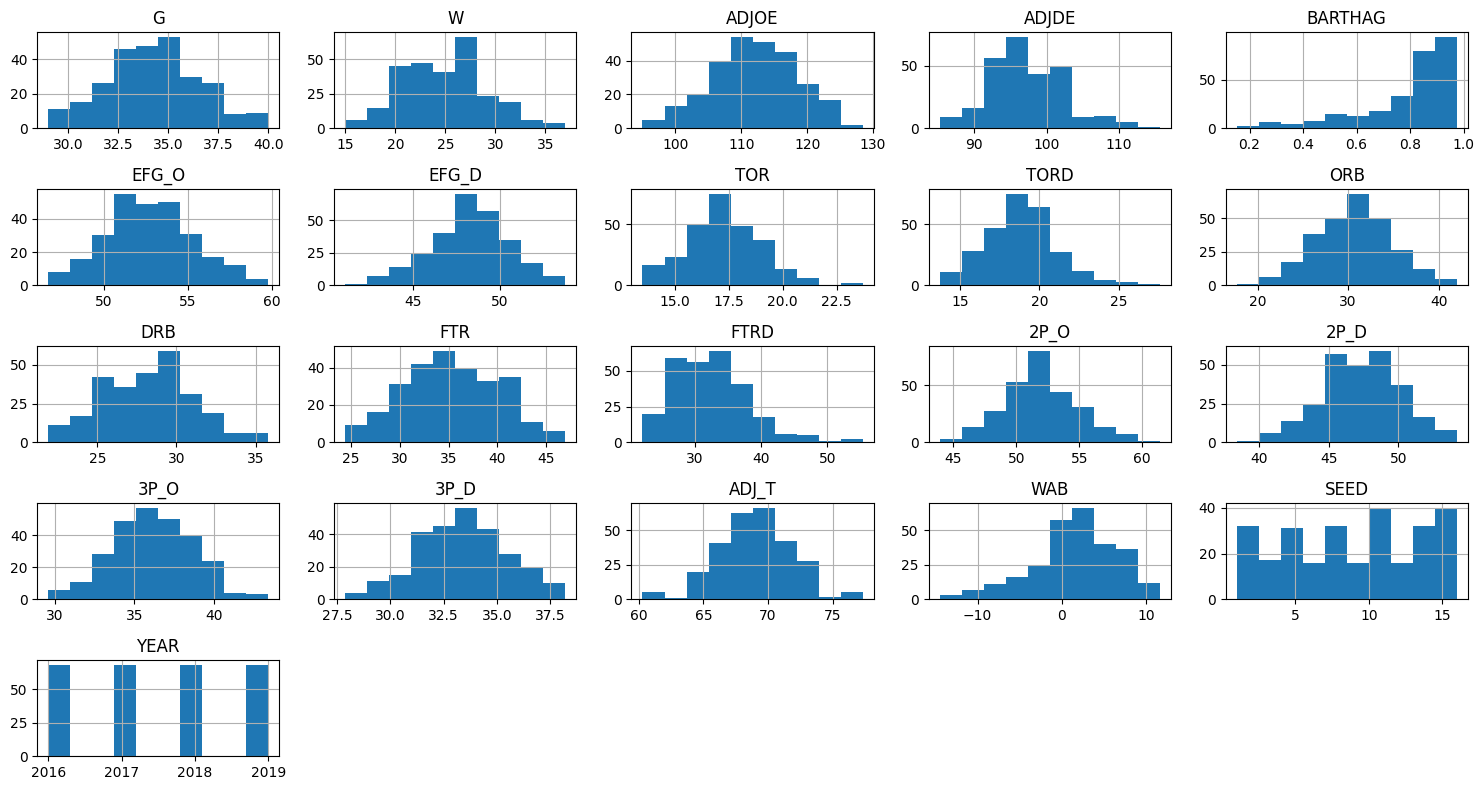

In [60]:
# importing visualiztation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# starting with numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 0:
    df[numerical_cols].hist(figsize=(15,8))
    plt.tight_layout()
    plt.show()

#### Insight is;
- This only showcases numerical data types. They are mostly normally distributed, especially the FTR, EFG_D, ORB.
- Data columns to ignore are Year, SEED, BARTHAG.
- The categorical data types have been excluded though, should be visualized next.
- However, we've gotten an idea on the kind of datatypes to choose for feature extraction, training and testing. 

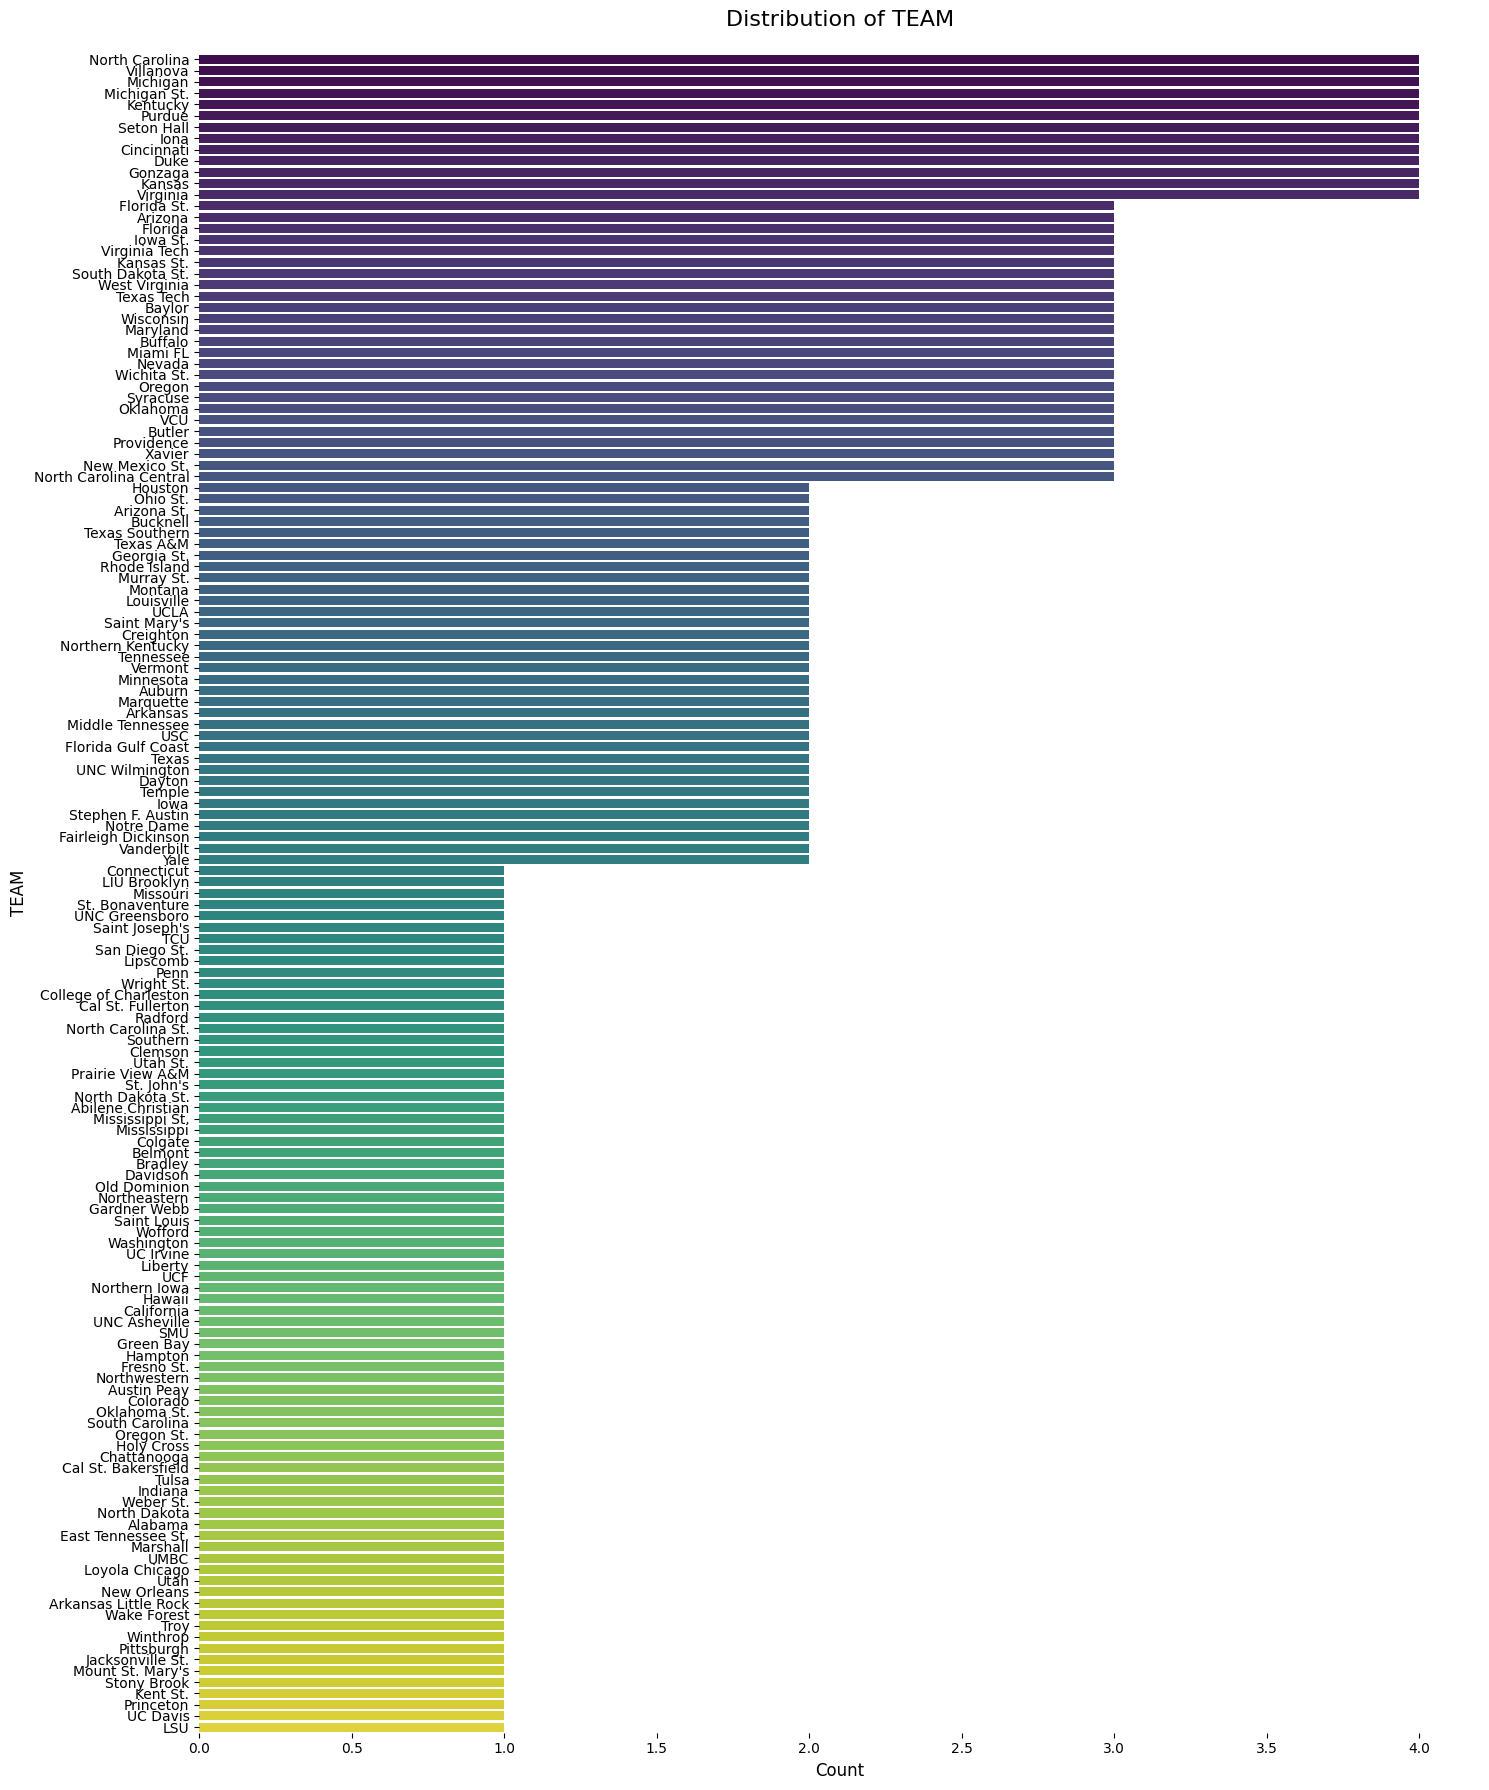

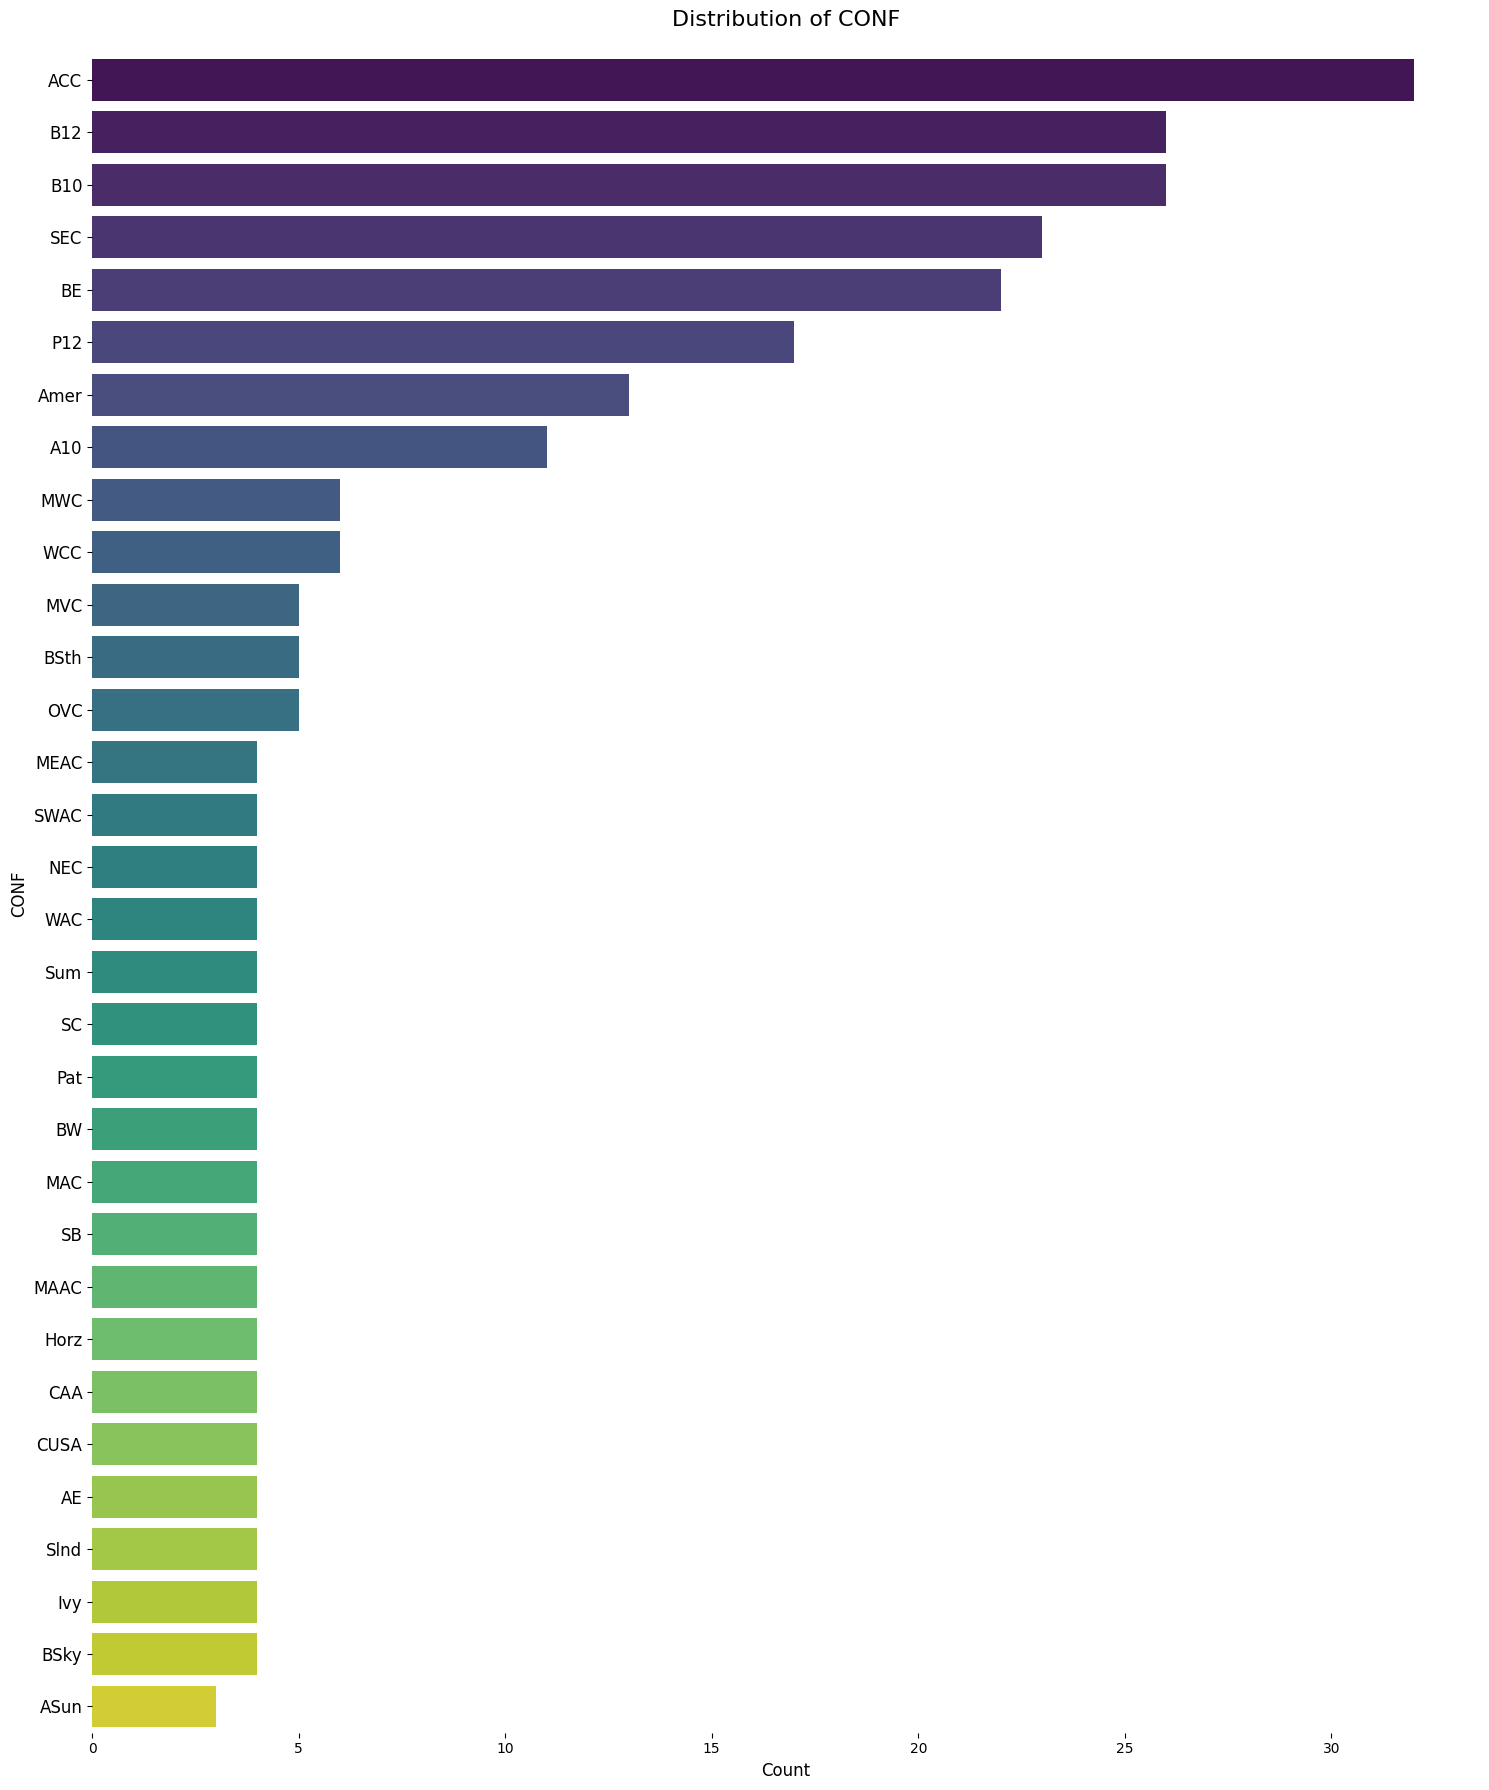

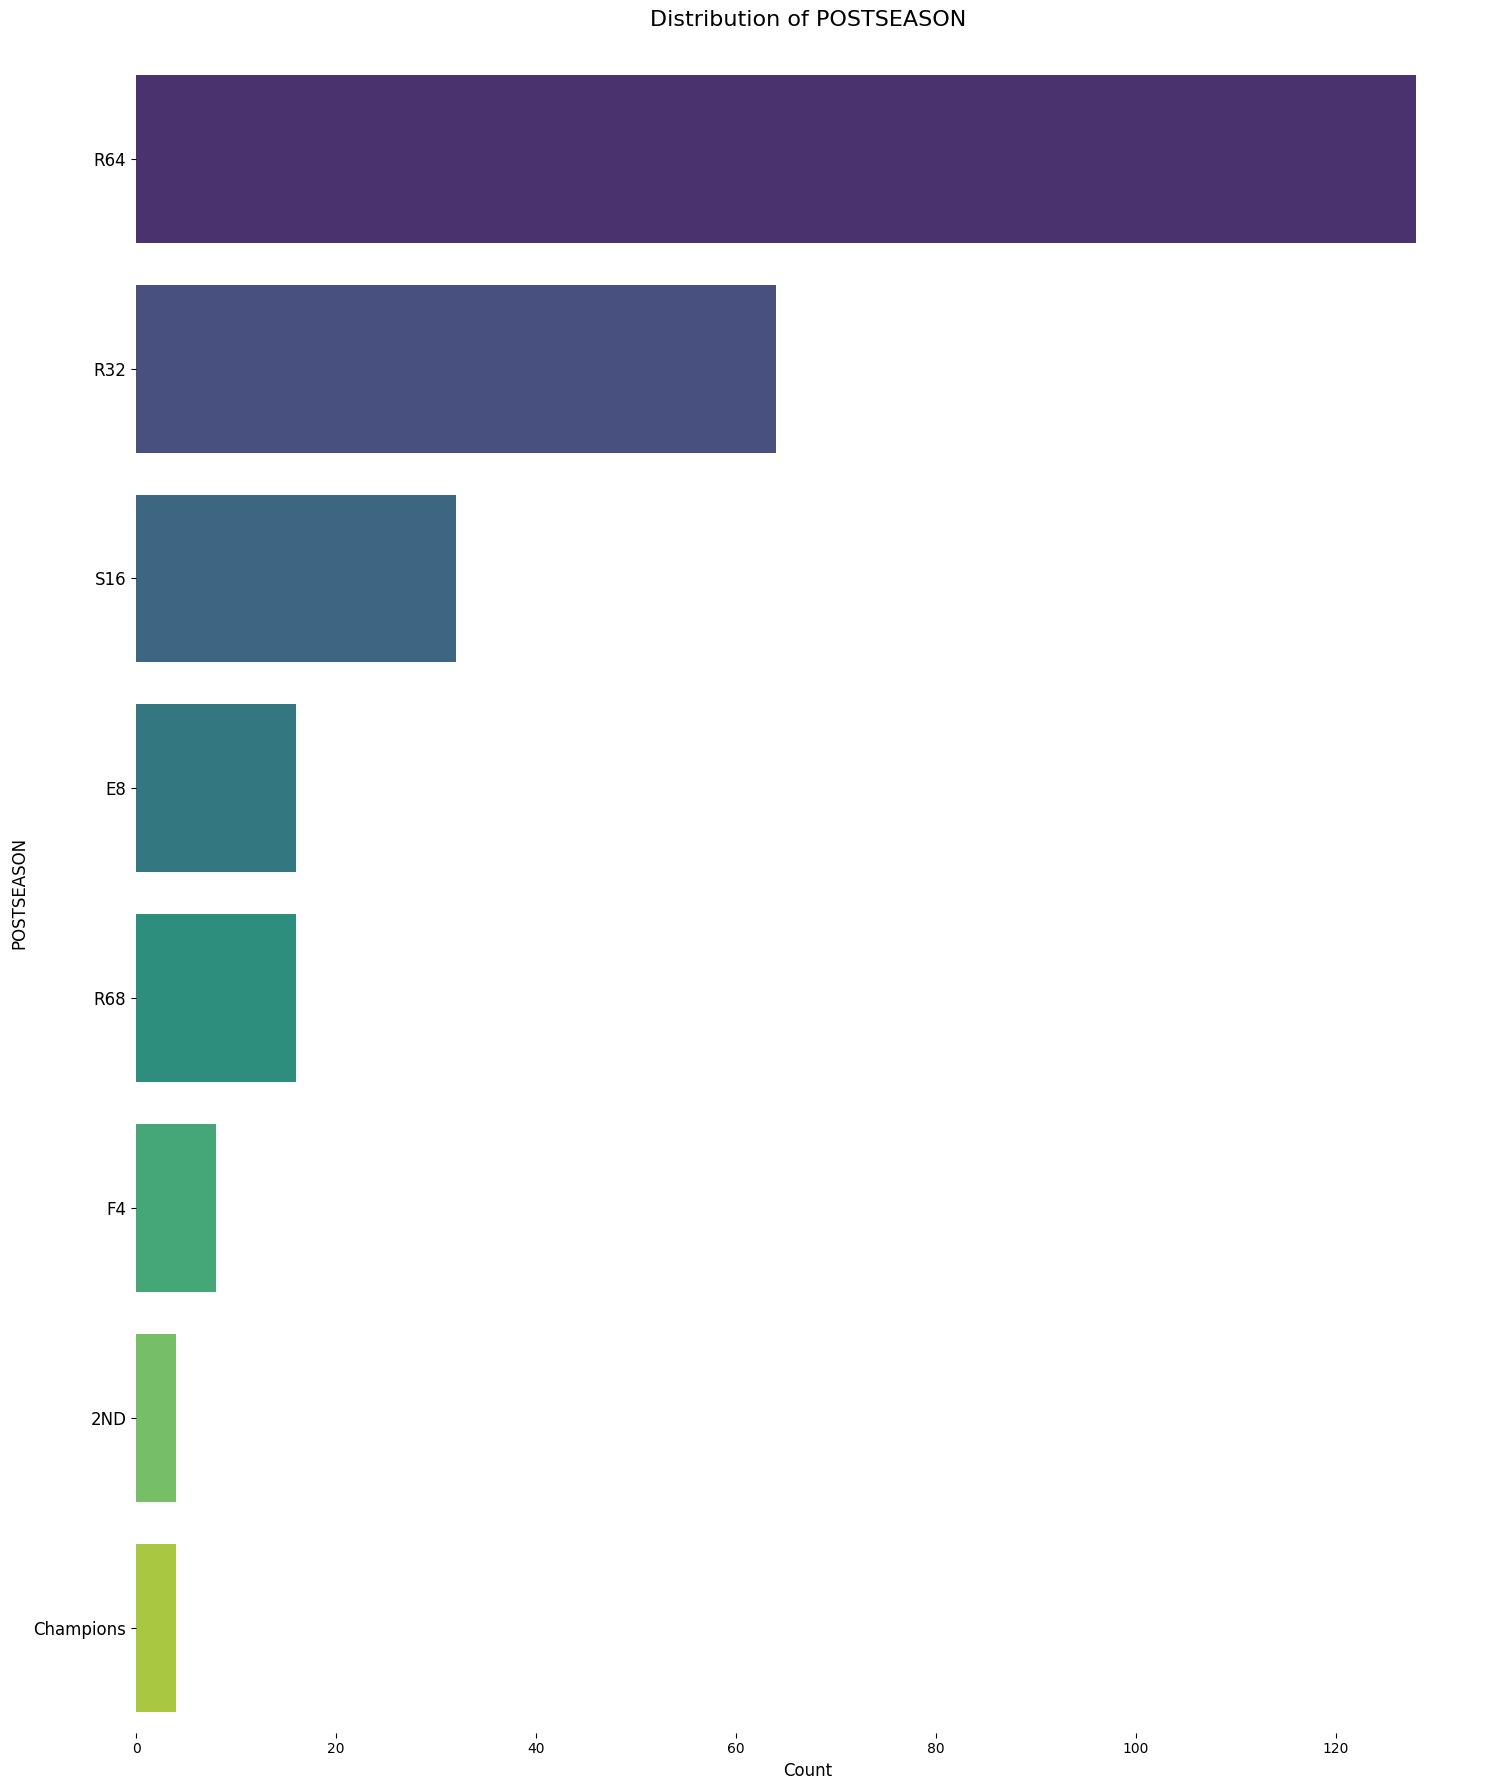

In [61]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(15, 18))
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    
    ax = sns.barplot(
        data=counts, 
        y=col, 
        x='count',
        hue=col,  
        palette='viridis',
        dodge=False,  
        legend=False  
    )
    
    plt.title(f"Distribution of {col}", fontsize=16, pad=20)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col, fontsize=12)

    sns.despine(left=True, bottom=True)
    
    #auto-adjusting the y-axis font size based on number of categories
    n_categories = len(counts)
    fontsize = max(8, 12 - int(n_categories/50)) 
    plt.yticks(fontsize=fontsize)
    
    plt.tight_layout()
    plt.show()

#### Insight;
- Will probably convert the categorical data, in order to pass the whole data frame for feature selection, since in with this visual it's not clear if it's a possible feature selection.

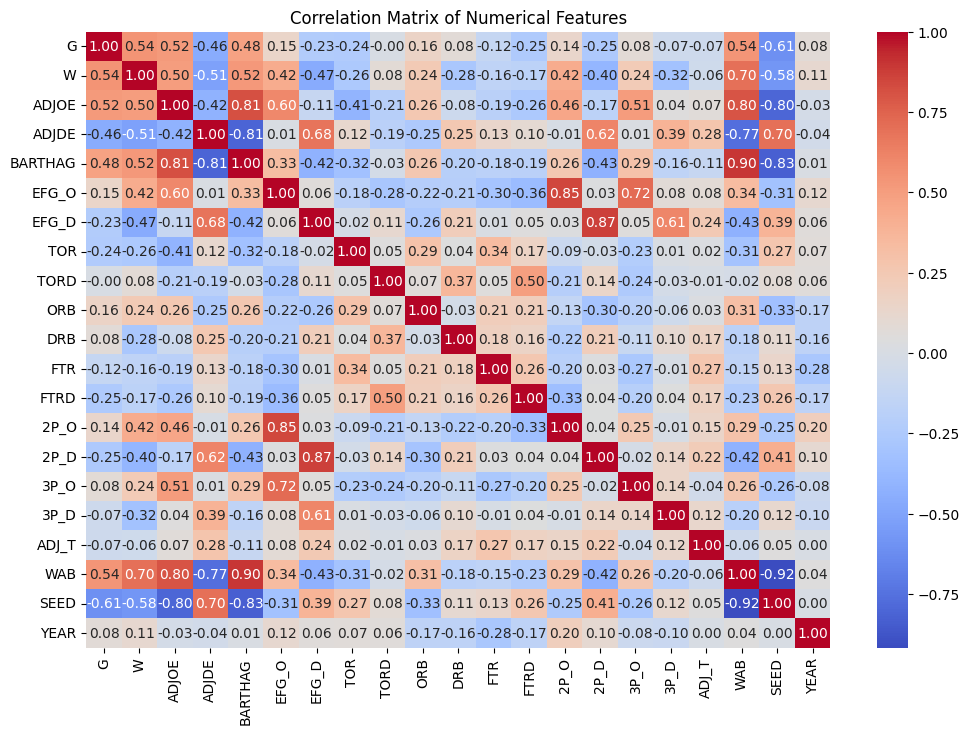

In [62]:
#correlation matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


#### 3.3 Feature selection

In [38]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA

#### Additional Data Pre-Processing

In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

#had to revert back to the old df, no longer using new_df, since I've repeated the data pre-processing again due to a lot of errors and confusion coming, remember to get rid of the other preprocessing to get the new_df variable, #

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)


#### 3.4 Convertion of categorical features to numerical
- Came acroos a lot of errors using categorical features as is, when trying feature extraction and selection.
- Decided to retrace steps and convert them for easier management,calculation, selection, extraction and remove confusion.

In [43]:
#converting categorical features to numerical
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

#### 3.5 Feature selection

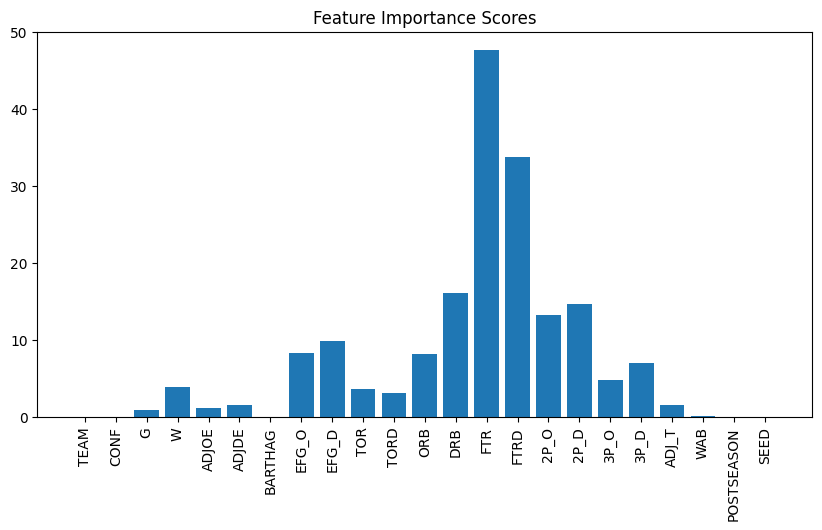

In [44]:
#separating features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#fature selection (example using SelectKBest)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

plt.figure(figsize=(10, 5))
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), df.columns[:-1], rotation=90)
plt.title('Feature Importance Scores')
plt.show()

#select top k features, went with 5
k = 5
top_features_indices = selector.scores_.argsort()[-k:][::-1]
X = X[:, top_features_indices]

In [ ]:
top_feature_names = df.columns[top_features_indices].tolist()
print("Top 5 features:", top_feature_names)

# Create feature matrix
X_top = df[top_feature_names].values

Top 5 features: ['FTR', 'FTRD', 'DRB', '2P_D', '2P_O']


#### Insight is:
- SelectKBest analysis identified the following top 5 as most important because:
1. FTR (likely "Final Team Rating"): Strongest statistical relationship with target.
2. FTRD (probably "Final Team Rating Defense"): Complementary defensive metric.
3. DRB (Defensive Rebounds): Key basketball performance indicator.
4. 2P_D (2-Point Defense): Shooting defense effectiveness
5. 2P_O (2-Point Offense): Shooting offense effectiveness

- So to choose the features to compare along we can take those top 5 features.

In [69]:
top_features = ['FTR', 'FTRD', 'DRB', '2P_D', '2P_O']
X = df[top_features]
y = df['POSTSEASON']

#### 3.6 Feature Extraction
- Chose not to ude PCA since I have strong domain relevant features(my top 5 features)

In [87]:
#basketball-specific composite features
df['NET_RATING'] = df['FTR'] - df['FTRD']
df['DEFENSE_EFFICIENCY'] = df['FTRD'] / df['DRB']
df['OFFENSE_EFFICIENCY'] = df['FTR'] * df['2P_O']

#top features with engineered ones
top_features = ['FTR', 'NET_RATING', 'DEFENSE_EFFICIENCY', 'OFFENSE_EFFICIENCY', 'DRB']
X = df[top_features]
y = df['POSTSEASON']

#### 4 Normalisation of Data

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)



#### 4.1 Splitting data for training and testing purposes

In [89]:

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

#### 5 Model Training and Validation
- Paasing it through the following models;
1. KNN
2. Decision Tree
3. SVM
4. Logistic regression 

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

models = {
    "KNN": KNeighborsClassifier(n_neighbors=13),
    
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=10,
        random_state=42
    ),
    "SVM": SVC(
        C=1.5,
        kernel='rbf',
        gamma='scale',
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',
        C=0.1,
        solver='saga',
        max_iter=1000,
        random_state=42
    )
}

### Training and Validation

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

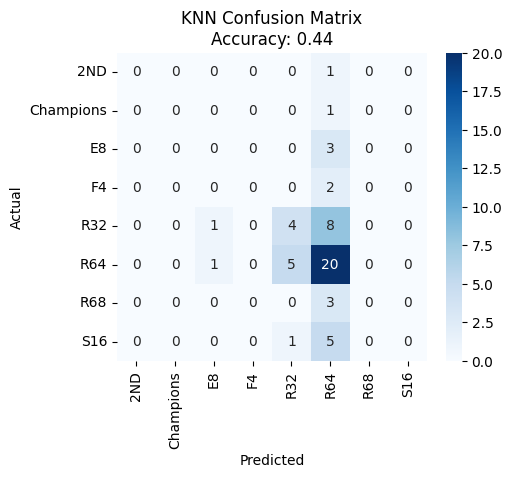

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

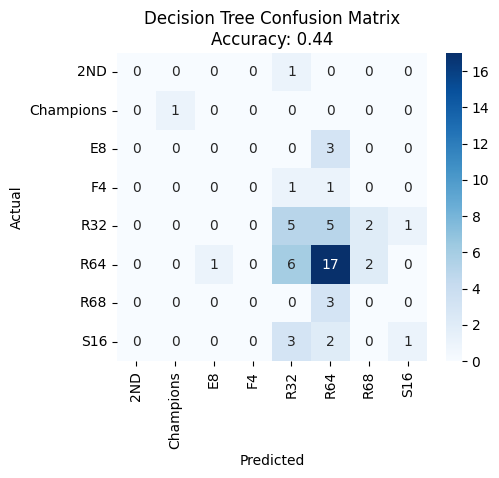

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

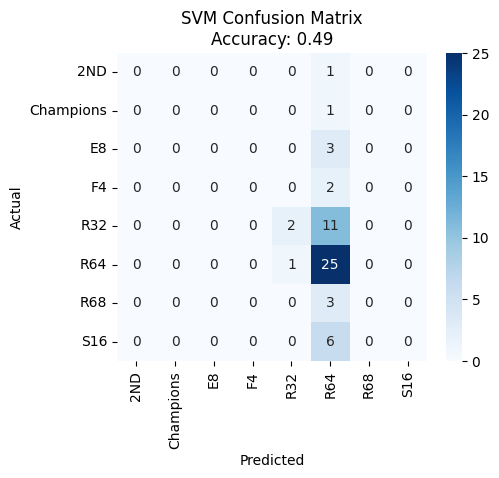

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

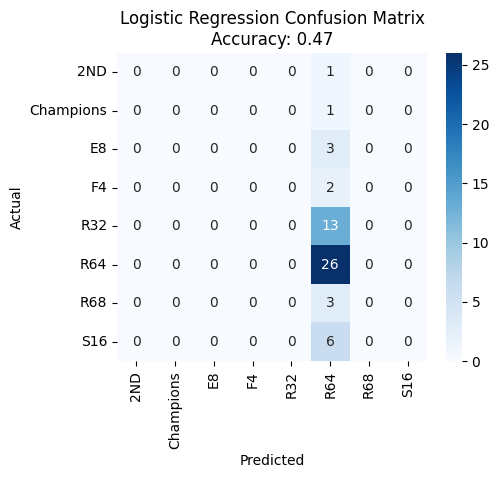

In [ ]:
#using a for loop to fit each of the models, get their predictions, the accuracy score for each model and visualize it via a confusion matrix.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

results = []
for name, model in models.items():
    #train
    model.fit(X_train, y_train)
    
    #predict
    y_pred = model.predict(X_test)
    
    #evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1': report['weighted avg']['f1-score']
    })
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, 
                yticklabels=model.classes_)
    plt.title(f'{name} Confusion Matrix\nAccuracy: {accuracy:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### 5 Model Evaluation and Comparing all the models


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


                 Model  Accuracy  CV_Accuracy        F1
2                  SVM  0.490909     0.474343  0.362121
3  Logistic Regression  0.472727     0.470707  0.303479
0                  KNN  0.436364     0.456094  0.356258
1        Decision Tree  0.436364     0.385791  0.408937


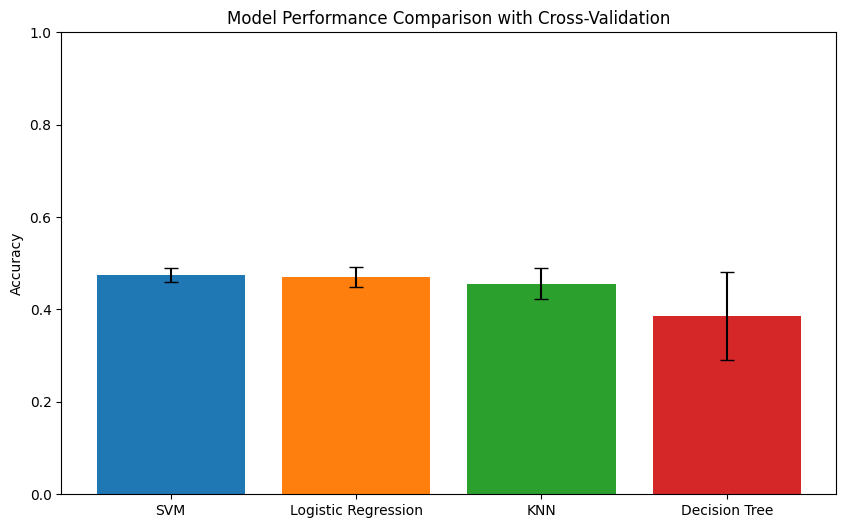

In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd

#add cross-validation
for model in results:
    cv_scores = cross_val_score(
        models[model['Model']], 
        X_normalized, 
        y, 
        cv=5,
        scoring='accuracy'
    )
    model['CV_Accuracy'] = cv_scores.mean()
    model['CV_Std'] = cv_scores.std()

#create and display results
results_df = pd.DataFrame(results).sort_values('CV_Accuracy', ascending=False)
print(results_df[['Model', 'Accuracy', 'CV_Accuracy', 'F1']])

#visual comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['CV_Accuracy'], 
        yerr=results_df['CV_Std'],
        capsize=5,
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylim(0, 1)
plt.title('Model Performance Comparison with Cross-Validation')
plt.ylabel('Accuracy')
plt.show()


Model Ranking by Accuracy:
1. SVM: 0.3617
2. Logistic Regression: 0.3440
3. Decision Tree: 0.3262
4. KNN: 0.3121


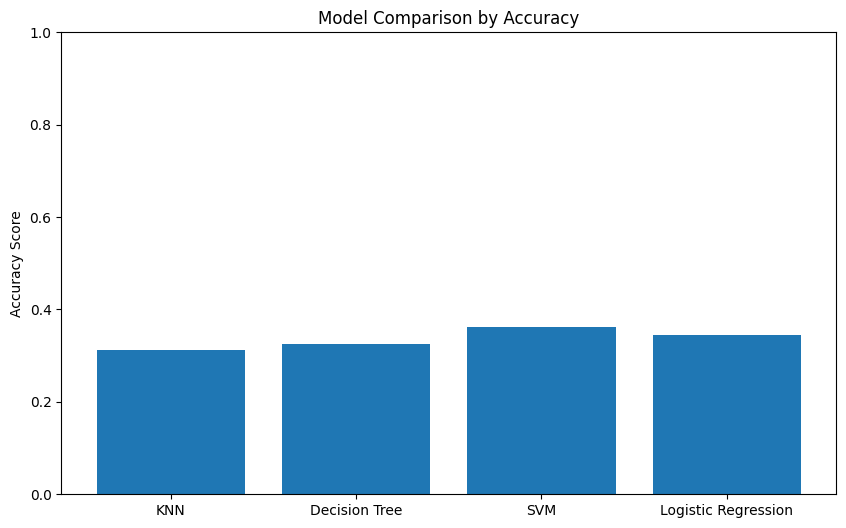

In [54]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Ranking by Accuracy:")
for rank, (name, accuracy) in enumerate(sorted_results, 1):
    print(f"{rank}. {name}: {accuracy:.4f}")

# Visual comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.ylim(0, 1)
plt.title('Model Comparison by Accuracy')
plt.ylabel('Accuracy Score')
plt.show()

#### Conclusion:
- Even after several attempts to change the features selected and technique to extract,the it's come to my attention that the models still perform poorly.
- Even use of PCA, scaling for KNN parameters(hypertuning), cross validation does not better my case.
- With the models performing way below the 50% means my either my objective has been debunked or it isn't a right approach.
- Will definitely continue tinkering with the features to see if I can optimize it better.